11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


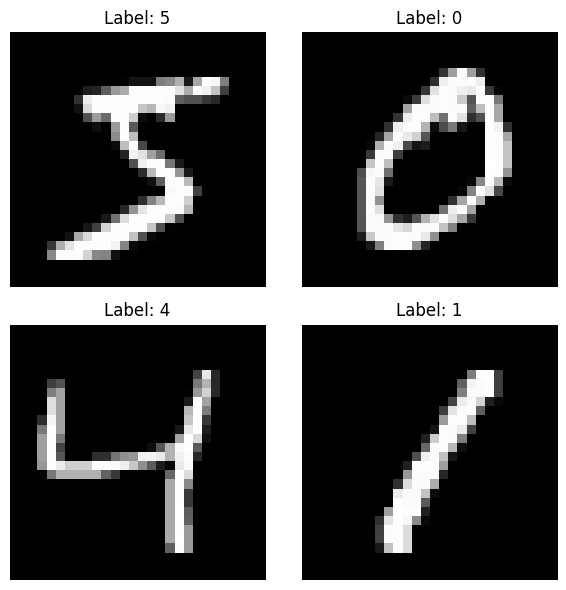

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd  # For data processing (not used here, but often helpful for CSVs)

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # Keras utility to load the MNIST dataset

# Load MNIST dataset
# Automatically downloads if not already cached
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check shape of loaded data (optional)
print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Test data shape:", X_test.shape)       # (10000, 28, 28)

# Plot the first 4 training images
plt.figure(figsize=(6, 6))  # Optional: set figure size
for i in range(4):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, subplot index i+1
    plt.imshow(X_train[i], cmap='gray')  # Show image in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Hide axis for clarity

# Display the combined plot
plt.tight_layout()
plt.show()


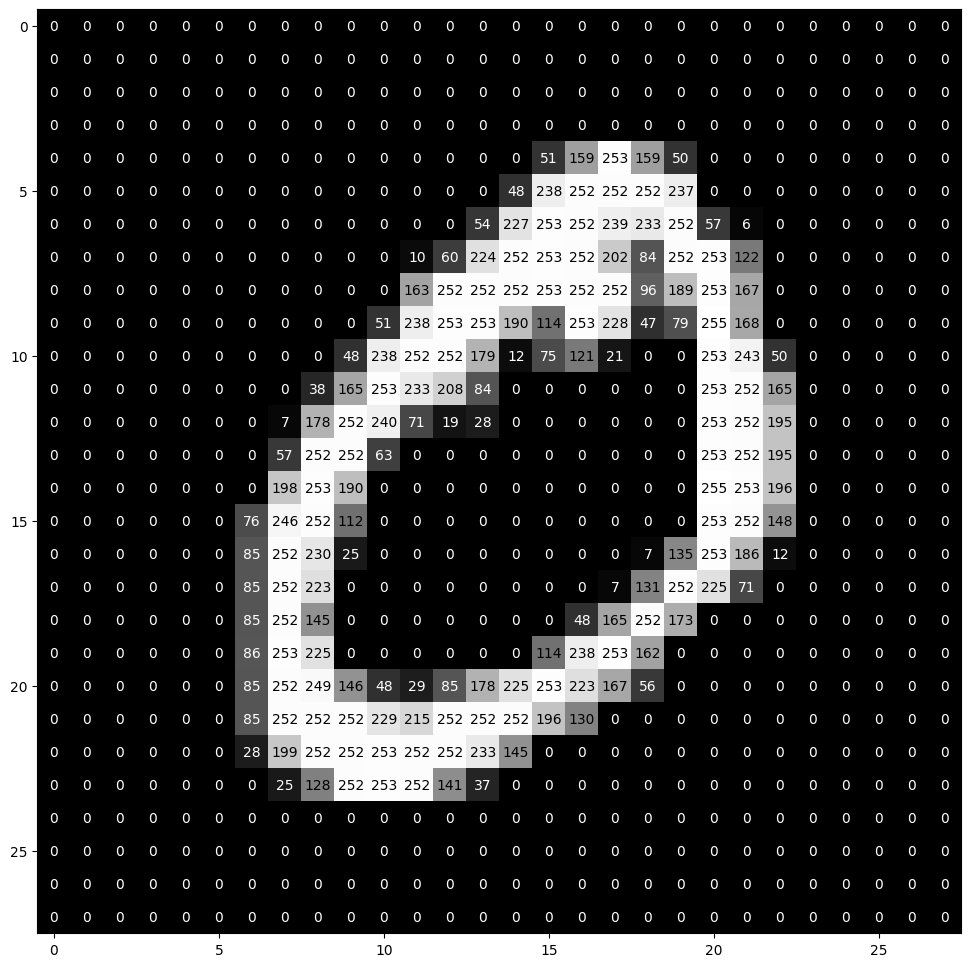

In [20]:
# This function will take an image (as a 2D array) and a matplotlib axis
# It will plot the image and then annotate each pixel with its grayscale value
# It's really helpful for visualizing pixel intensities in MNIST or similar data

def visualize_image_with_pixel_values(image, axis):
    # Show the grayscale image
    axis.imshow(image, cmap='gray')

    # Get the dimensions of the image
    num_rows, num_cols = image.shape

    # Set a threshold to decide the font color (light or dark) based on pixel brightness
    # This helps make the text readable against the background
    brightness_threshold = image.max() / 2.5

    # Loop over every pixel in the image
    for row in range(num_rows):
        for col in range(num_cols):
            # Round the pixel value for display (optional, to make it neater)
            pixel_value = round(image[row][col], 2)

            # Annotate each pixel with its value at the correct position
            axis.annotate(
                str(pixel_value),             # text to display
                xy=(col, row),                # x is col, y is row (image coordinates)
                horizontalalignment='center',
                verticalalignment='center',
                # Choose text color based on background brightness
                color='white' if image[row][col] < brightness_threshold else 'black'
            )

# Now let's create a big enough figure so the pixel values don't overlap
fig = plt.figure(figsize=(12, 12))

# Create one subplot (i.e., a single axis in the figure)
main_axis = fig.add_subplot(111)

# Call the visualization function using an MNIST image
# We're reshaping the image to 28x28 just in case it's a 1D array (as often is the case)
# You can pick any index from X_train (0 to 59999)
visualize_image_with_pixel_values(X_train[1].reshape(28, 28), main_axis)


In [ ]:
import seaborn as sns
g = sns.countplot(y_train)


KeyboardInterrupt: 

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
# Each MNIST image is 28x28 pixels.
# But a dense (fully connected) neural network doesn't take 2D images directly — it expects 1D vectors.
# So we're going to "flatten" each image from shape (28, 28) into a shape (784,)

# First, calculate the total number of pixels per image (28 * 28 = 784)
num_pixels = X_train.shape[1] * X_train.shape[2]

# Reshape the training data to (number of samples, 784)
# This converts each image from 28x28 to a flat vector of length 784
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')

# Do the same for the test data
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

#we could normalize pixel values to the range [0, 1] here by dividing by 255
# This helps the neural network train better
X_train /= 255
X_test /= 255


In [5]:
# Our labels (y_train, y_test) are currently just integers from 0 to 9,
# indicating which digit each image represents.

# But when training a neural network for classification, especially with categorical_crossentropy,
# it's better to use "one-hot encoding". This converts a class label (e.g., 3) into a vector like:
# [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] — where only the 3rd index is 'hot' (i.e., 1).

# Import the one-hot encoder correctly (since np_utils is deprecated in many Keras versions):
from tensorflow.keras.utils import to_categorical

# Apply one-hot encoding to the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Now, instead of a shape like (60000,), y_train has shape (60000, 10)
# Because each label is now a 10-dimensional vector

# Save the number of classes (should be 10 for digits 0-9)
num_classes = y_test.shape[1]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a basic MLP (Multi-Layer Perceptron) model
def baseline_model():
    # Start building the model — Sequential means each layer is stacked linearly
    model = Sequential()

    # Add the input layer + one hidden layer
    # - input_dim=num_pixels: we're feeding in 784 values (28x28 image flattened)
    # - units=num_pixels: using the same number of neurons as input features (a common starting point)
    # - kernel_initializer='normal': weights initialized from a normal distribution
    # - activation='relu': adds non-linearity and helps avoid vanishing gradient issues
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))

    # Output layer with softmax
    # - num_classes = 10 (digits 0-9), so 10 output neurons
    # - softmax will turn the outputs into probabilities that sum to 1
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile the model
    # - loss='categorical_crossentropy': appropriate for multiclass classification with one-hot targets
    # - optimizer='adam': good default optimizer that adapts learning rates
    # - metrics=['accuracy']: track accuracy during training and evaluation
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Now create an instance of the model
model = baseline_model()

# Let's see the model architecture
model.summary()


c:\Users\mishr\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model on the training data
model.fit(
    X_train,               # training features (flattened 28x28 images)
    y_train,               # one-hot encoded labels for training
    validation_data=(X_test, y_test),  # use test data for validation during training
    epochs=10,             # how many times to go through the full training dataset
    batch_size=200,        # number of samples per gradient update
    verbose=2              # prints progress bar (0 = silent, 1 = per batch, 2 = per epoch)
)

# Evaluate the model's final performance on test set
scores = model.evaluate(X_test, y_test, verbose=0)  # returns [loss, accuracy]

# Report the test error in percentage
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))


Epoch 1/10
300/300 - 3s - 9ms/step - accuracy: 0.9193 - loss: 0.2826 - val_accuracy: 0.9591 - val_loss: 0.1395
Epoch 2/10
300/300 - 2s - 6ms/step - accuracy: 0.9674 - loss: 0.1116 - val_accuracy: 0.9714 - val_loss: 0.0976
Epoch 3/10
300/300 - 2s - 6ms/step - accuracy: 0.9794 - loss: 0.0719 - val_accuracy: 0.9744 - val_loss: 0.0804
Epoch 4/10
300/300 - 3s - 9ms/step - accuracy: 0.9856 - loss: 0.0500 - val_accuracy: 0.9749 - val_loss: 0.0784
Epoch 5/10
300/300 - 3s - 10ms/step - accuracy: 0.9902 - loss: 0.0358 - val_accuracy: 0.9788 - val_loss: 0.0657
Epoch 6/10
300/300 - 3s - 10ms/step - accuracy: 0.9935 - loss: 0.0258 - val_accuracy: 0.9807 - val_loss: 0.0610
Epoch 7/10
300/300 - 4s - 13ms/step - accuracy: 0.9953 - loss: 0.0192 - val_accuracy: 0.9794 - val_loss: 0.0638
Epoch 8/10
300/300 - 2s - 6ms/step - accuracy: 0.9966 - loss: 0.0147 - val_accuracy: 0.9822 - val_loss: 0.0619
Epoch 9/10
300/300 - 2s - 6ms/step - accuracy: 0.9982 - loss: 0.0101 - val_accuracy: 0.9817 - val_loss: 0.060

In [8]:
# Import required libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the CNN input requirements: (samples, height, width, channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize pixel values from [0, 255] → [0, 1]
x_train /= 255.0
x_test /= 255.0

# Convert labels to one-hot encoding (e.g., 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Define a simple Convolutional Neural Network (CNN) architecture
def build_cnn_model():
    model = Sequential()
    
    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    
    # Max-pooling reduces spatial dimensions
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add a second conv-pool block to learn more complex patterns
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Regularization to avoid overfitting
    model.add(Dropout(0.3))
    
    # Flatten the feature maps before feeding into dense layers
    model.add(Flatten())
    
    # Fully connected dense layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # Output layer with softmax to classify into 10 digits
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with categorical crossentropy loss and Adam optimizer
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    return model

# Build the model
cnn_model = build_cnn_model()
cnn_model.summary()

# Train the model
cnn_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=128,
    verbose=2
)

# Evaluate final performance on test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc * 100:.2f}%")
print(f"Baseline Error: {100 - test_acc * 100:.2f}%")


c:\Users\mishr\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 - 9s - 18ms/step - accuracy: 0.9346 - loss: 0.2254 - val_accuracy: 0.9820 - val_loss: 0.0557
Epoch 2/10
469/469 - 10s - 22ms/step - accuracy: 0.9799 - loss: 0.0653 - val_accuracy: 0.9858 - val_loss: 0.0422
Epoch 3/10
469/469 - 7s - 15ms/step - accuracy: 0.9845 - loss: 0.0484 - val_accuracy: 0.9906 - val_loss: 0.0295
Epoch 4/10
469/469 - 8s - 17ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.9919 - val_loss: 0.0263
Epoch 5/10
469/469 - 8s - 17ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9916 - val_loss: 0.0254
Epoch 6/10
469/469 - 8s - 16ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9908 - val_loss: 0.0270
Epoch 7/10
469/469 - 8s - 17ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9926 - val_loss: 0.0222
Epoch 8/10
469/469 - 8s - 17ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9914 - val_loss: 0.0254
Epoch 9/10
469/469 - 8s - 17ms/step - accuracy: 0.9946 - loss: 0.0179 - val_accuracy: 0.9916 - val_loss